<a href="https://colab.research.google.com/github/YBharatiyadav/Stroke-Prediction-/blob/main/Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_stroke = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [ ]:
df_st = df_stroke.sample(frac=1).reset_index(drop=True)

In [ ]:
df_st.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df_st['bmi'].fillna(method = 'bfill',inplace=True)

In [ ]:
df_st.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df_st.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df_st.drop('id',axis=1,inplace=True)

In [ ]:
df_st.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,27.0,0,0,No,Private,Urban,126.09,25.1,Unknown,0
1,Male,8.0,0,0,No,children,Rural,121.99,19.6,Unknown,0
2,Male,62.0,0,0,Yes,Self-employed,Rural,136.18,32.2,Unknown,0
3,Male,32.0,0,0,Yes,Self-employed,Urban,160.64,20.4,smokes,0
4,Male,43.0,0,0,Yes,Private,Urban,92.71,30.5,formerly smoked,0


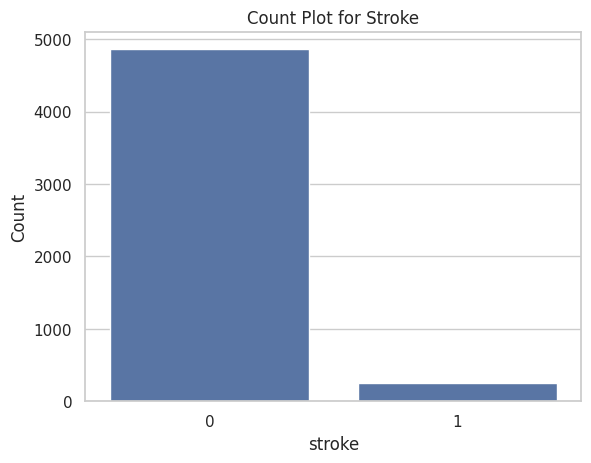

In [ ]:
sns.countplot(x = 'stroke',data=df_st)
sns.set(style="whitegrid")
plt.title(f"Count Plot for Stroke")
plt.xlabel("stroke")
plt.ylabel("Count")
plt.show()

From the above graph we can say that the data is highly imbalance.
The number of peoples suffering from stroke is very small as compared to the people haven't stroke.

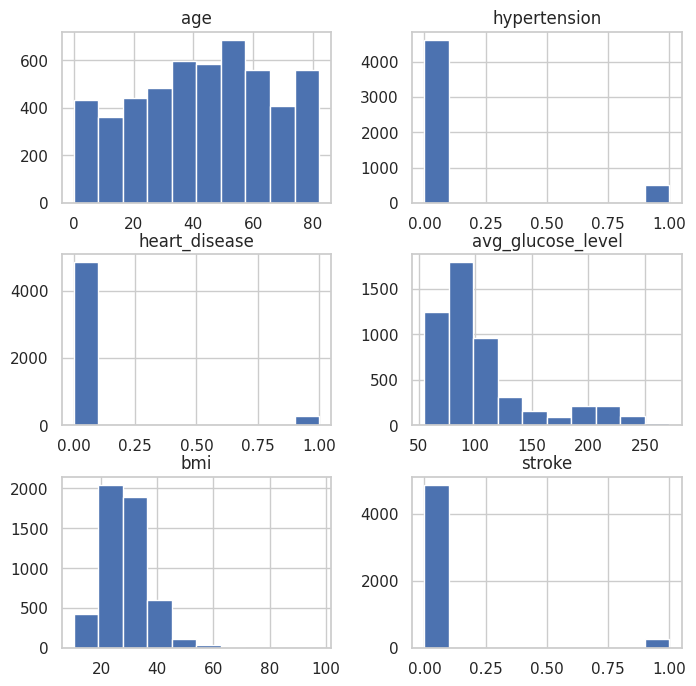

In [ ]:
df_st.hist(figsize=(8,8))
plt.show()

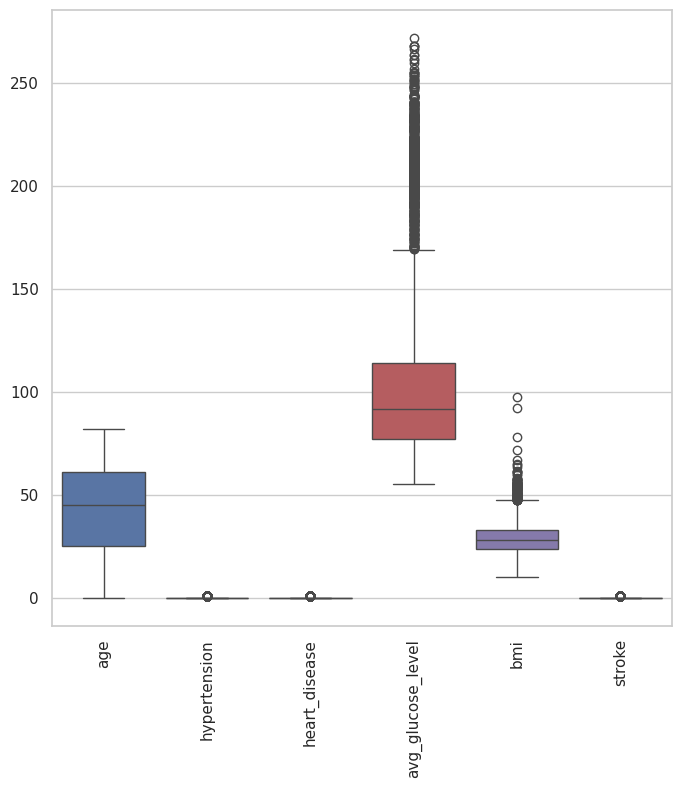

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(df_st)
plt.xticks(rotation=90)
plt.show()

There are some outliers with bmi.

age
-0.13701908663960244


<ipython-input-64-370ff3f90a6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_st[col])


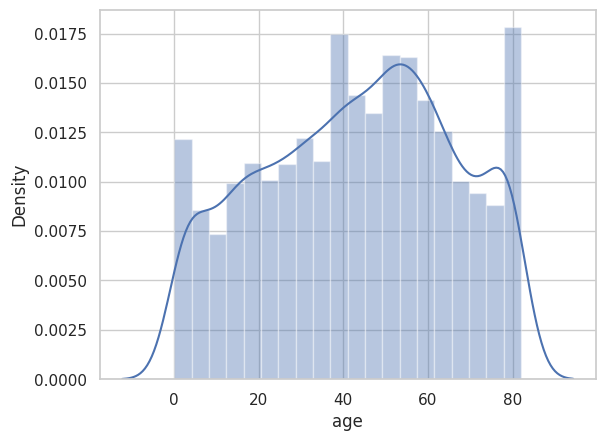

bmi
1.0392351470140744


<ipython-input-64-370ff3f90a6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_st[col])


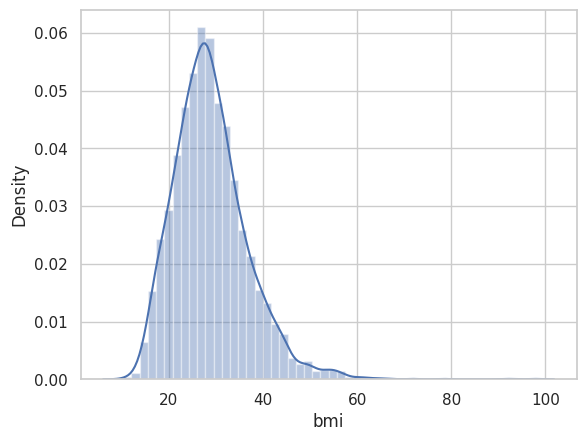

avg_glucose_level
1.5718222973971987


<ipython-input-64-370ff3f90a6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_st[col])


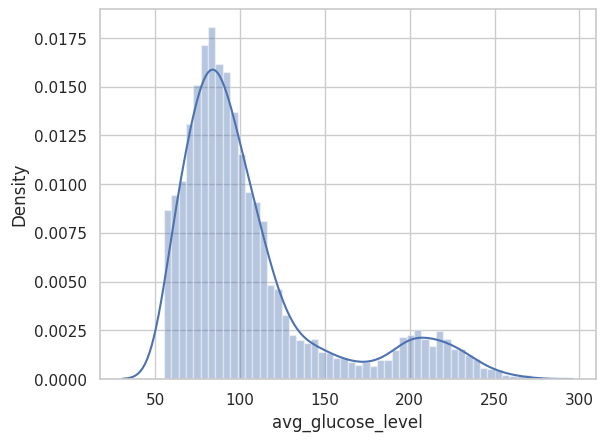

In [ ]:
from scipy.stats import skew
for col in ['age', 'bmi', 'avg_glucose_level']:
  print(col)
  print(skew(df_st[col]))

  plt.figure()
  sns.distplot(df_st[col])
  plt.show()

In [ ]:
Q1 = df_st['age'].quantile(0.25)
Q3 = df_st['age'].quantile(0.75)
IQR = Q3 - Q1
da_age=(df_st['age'] < (Q1 - 1.5 * IQR)) | (df_st['age'] > (Q3 + 1.5 * IQR))
da_age.value_counts()

age
False    5110
Name: count, dtype: int64

In [ ]:
Q1 = df_st['bmi'].quantile(0.25)
Q3 = df_st['bmi'].quantile(0.75)
IQR = Q3 - Q1
da_bmi=(df_st['bmi'] < (Q1 - 1.5 * IQR)) | (df_st['bmi'] > (Q3 + 1.5 * IQR))
da_bmi.value_counts()

bmi
False    4991
True      119
Name: count, dtype: int64

In [ ]:
Q1 = df_st['avg_glucose_level'].quantile(0.25)
Q3 = df_st['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da_avg=(df_st['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df_st['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da_avg.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

In [ ]:
df_st = df_st[~da_bmi]
df_st = df_st[~da_avg]

<ipython-input-68-9a102df5caaa>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_st = df_st[~da_avg]


<ipython-input-69-ef624e9d0b8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_st[col])


0.34164883112246963


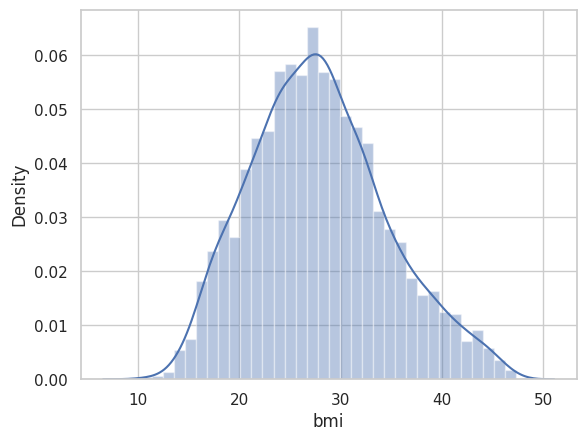

0.8528850288030484


<ipython-input-69-ef624e9d0b8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_st[col])


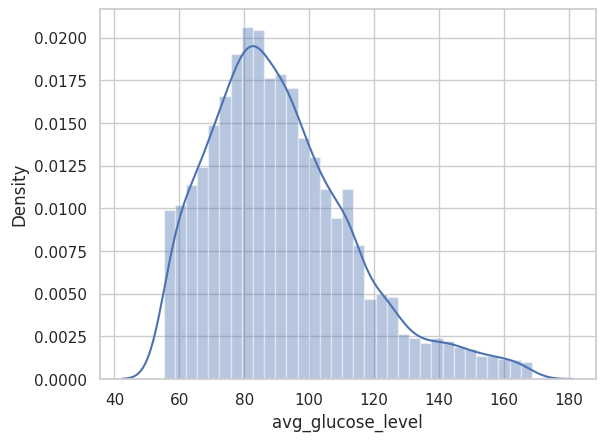

In [ ]:
from scipy.stats import skew
lst = ['bmi','avg_glucose_level']
for col in lst:
  print(skew(df_st[col]))
  plt.figure()
  sns.distplot(df_st[col])
  plt.show()

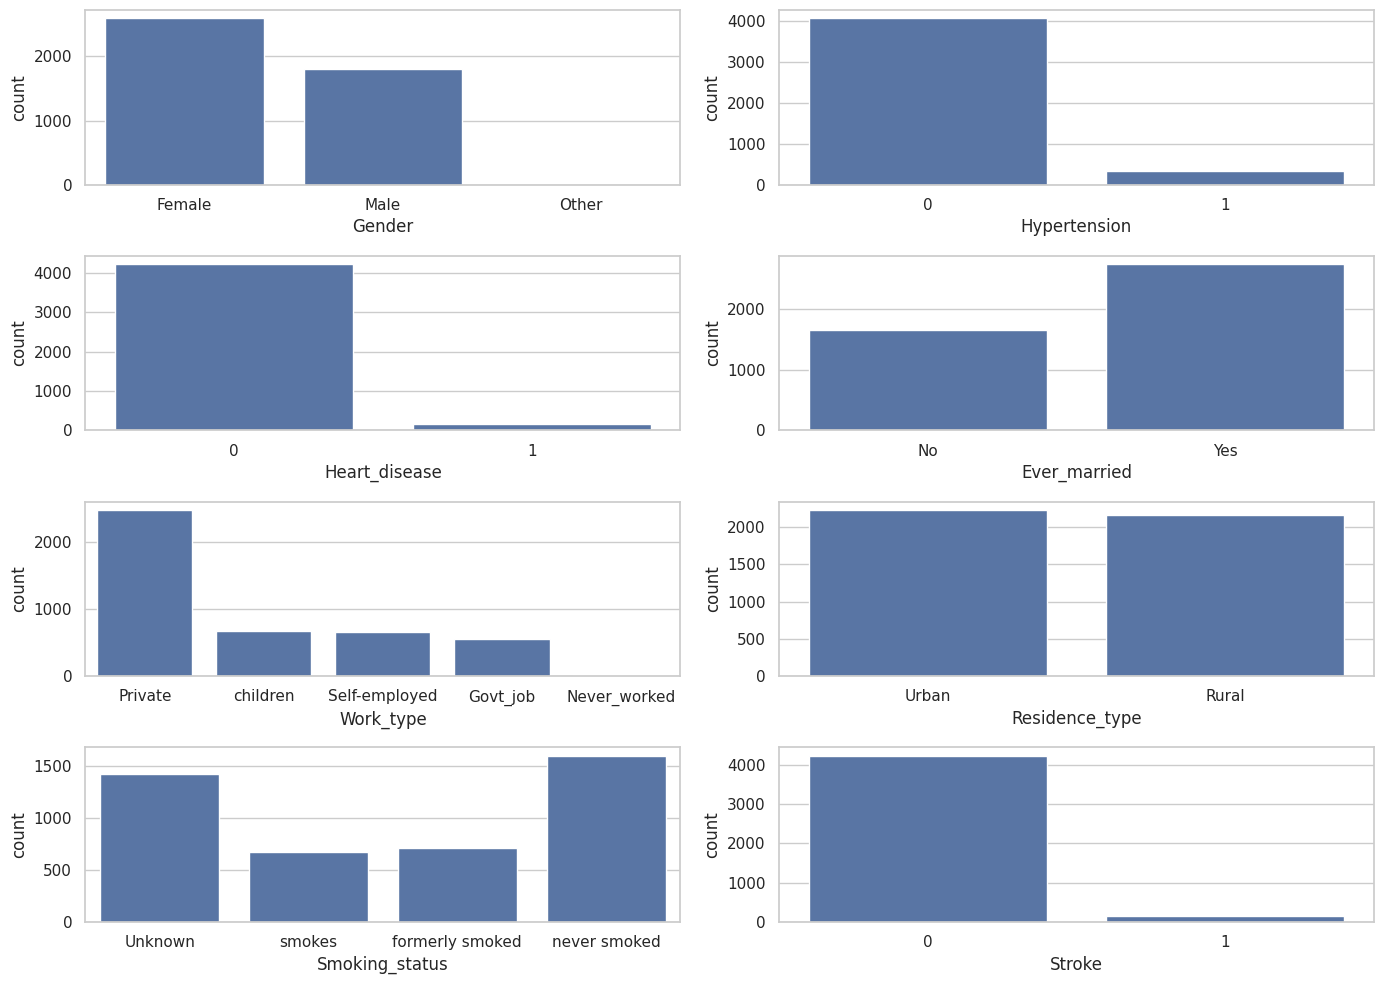

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14, 10))

sns.countplot(ax=axes[0, 0], data=df_st, x='gender')
sns.countplot(ax=axes[0, 1], data=df_st, x='hypertension')
sns.countplot(ax=axes[1, 0], data=df_st, x='heart_disease')
sns.countplot(ax=axes[1, 1], data=df_st, x='ever_married')
sns.countplot(ax=axes[2, 0], data=df_st, x='work_type')
sns.countplot(ax=axes[2, 1], data=df_st, x='Residence_type')
sns.countplot(ax=axes[3, 0], data=df_st, x='smoking_status')
sns.countplot(ax=axes[3, 1], data=df_st, x='stroke')

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel().capitalize())

plt.tight_layout()
plt.show()


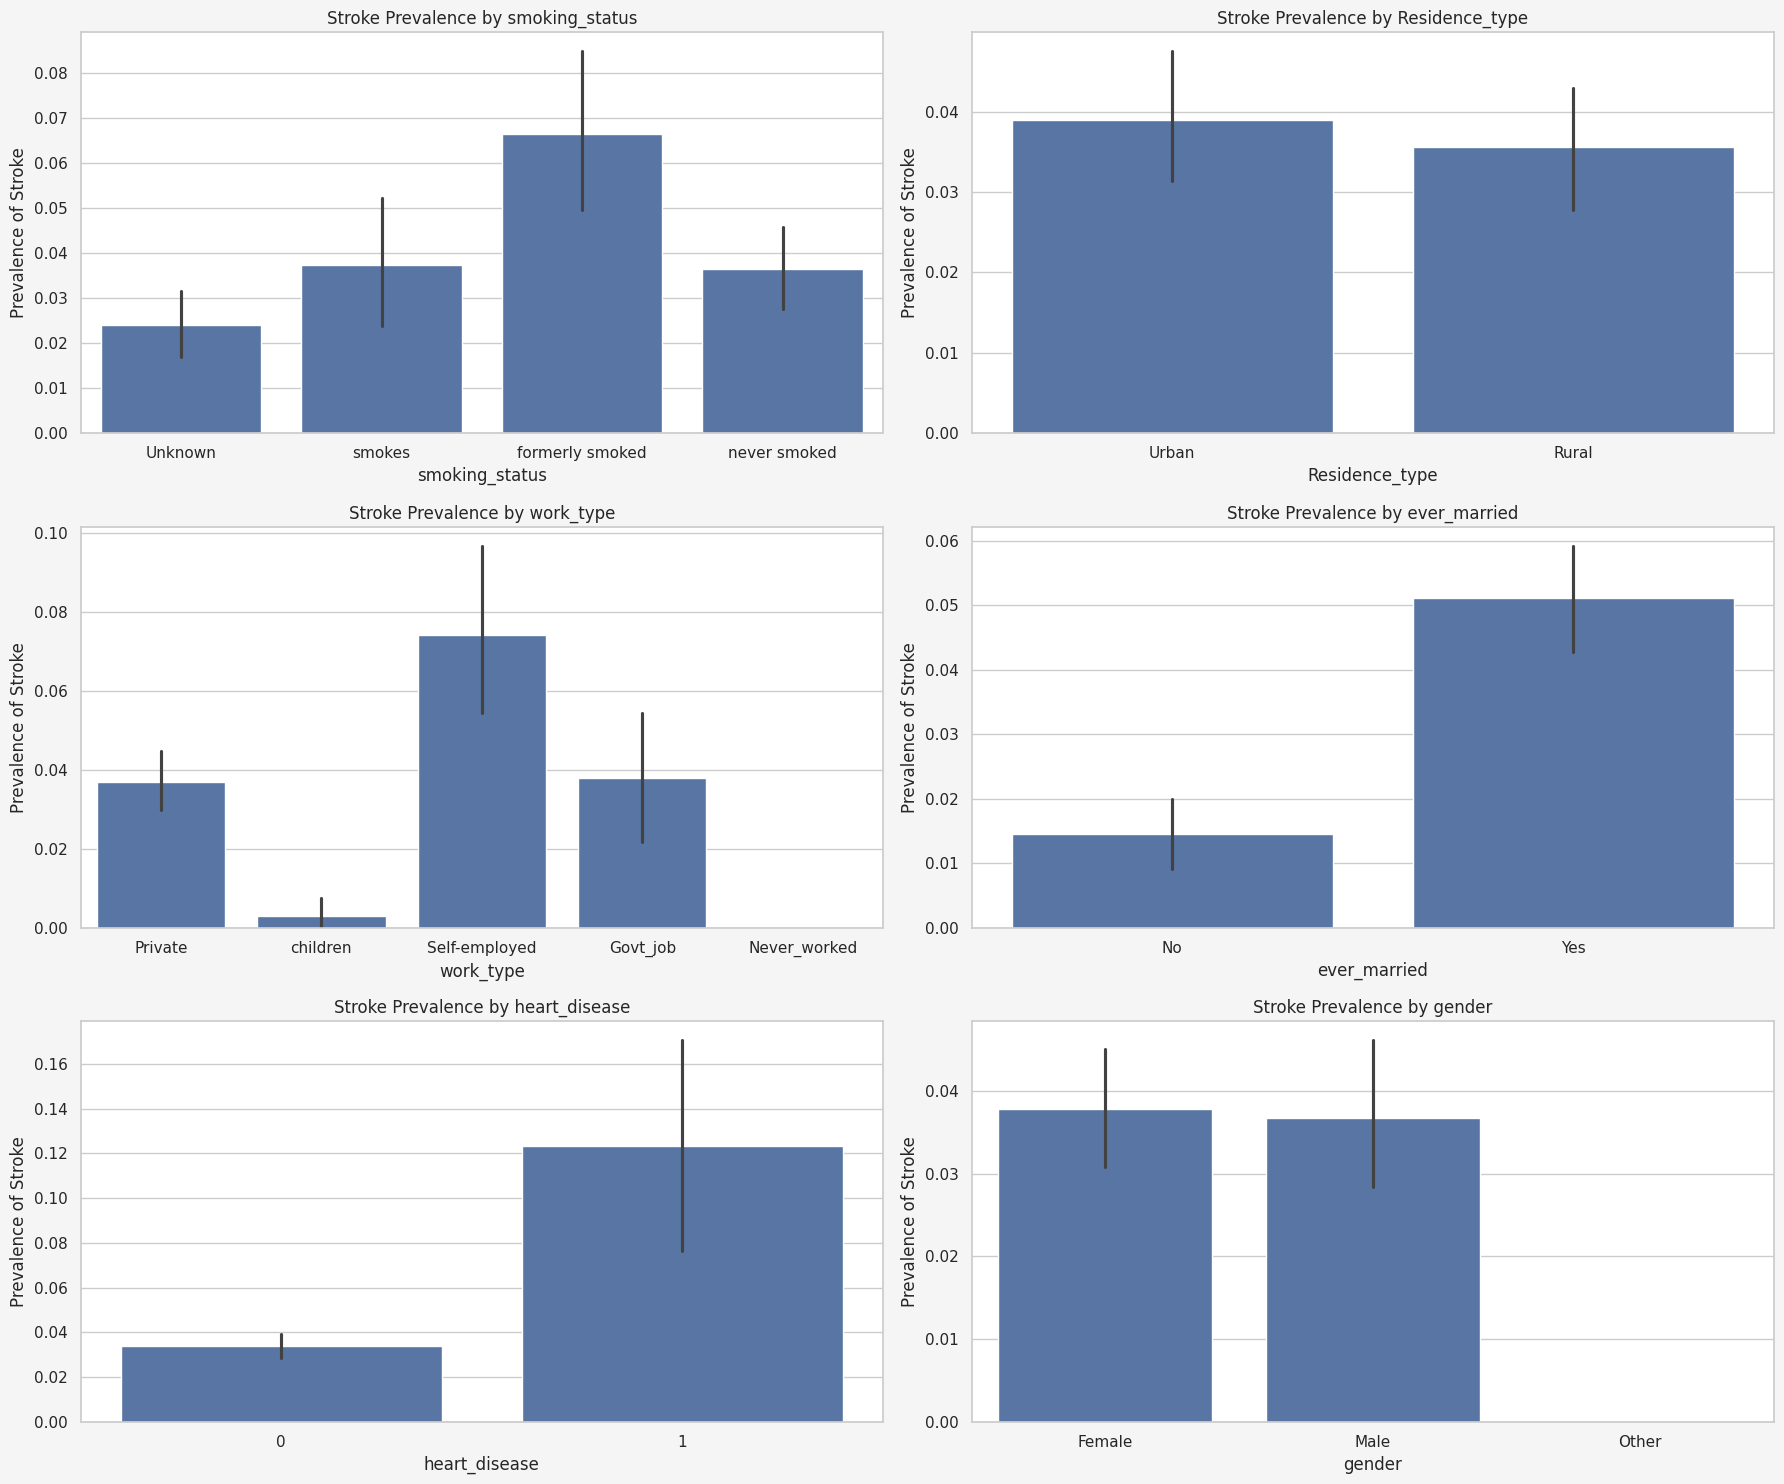

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
fig.patch.set_facecolor('#f6f5f5')

columns = ['smoking_status', 'Residence_type', 'work_type', 'ever_married', 'heart_disease', 'gender']
for i, col in enumerate(columns):
    sns.barplot(data=df_st, x=col, y='stroke', estimator=lambda x: sum(x) / len(x), ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Stroke Prevalence by {col}')
    axes[i // 2, i % 2].set_ylabel('Prevalence of Stroke')

plt.tight_layout()
plt.show()


 The prevalence of stroke appears to be greater among those who are self-employed also for the heart_disease.


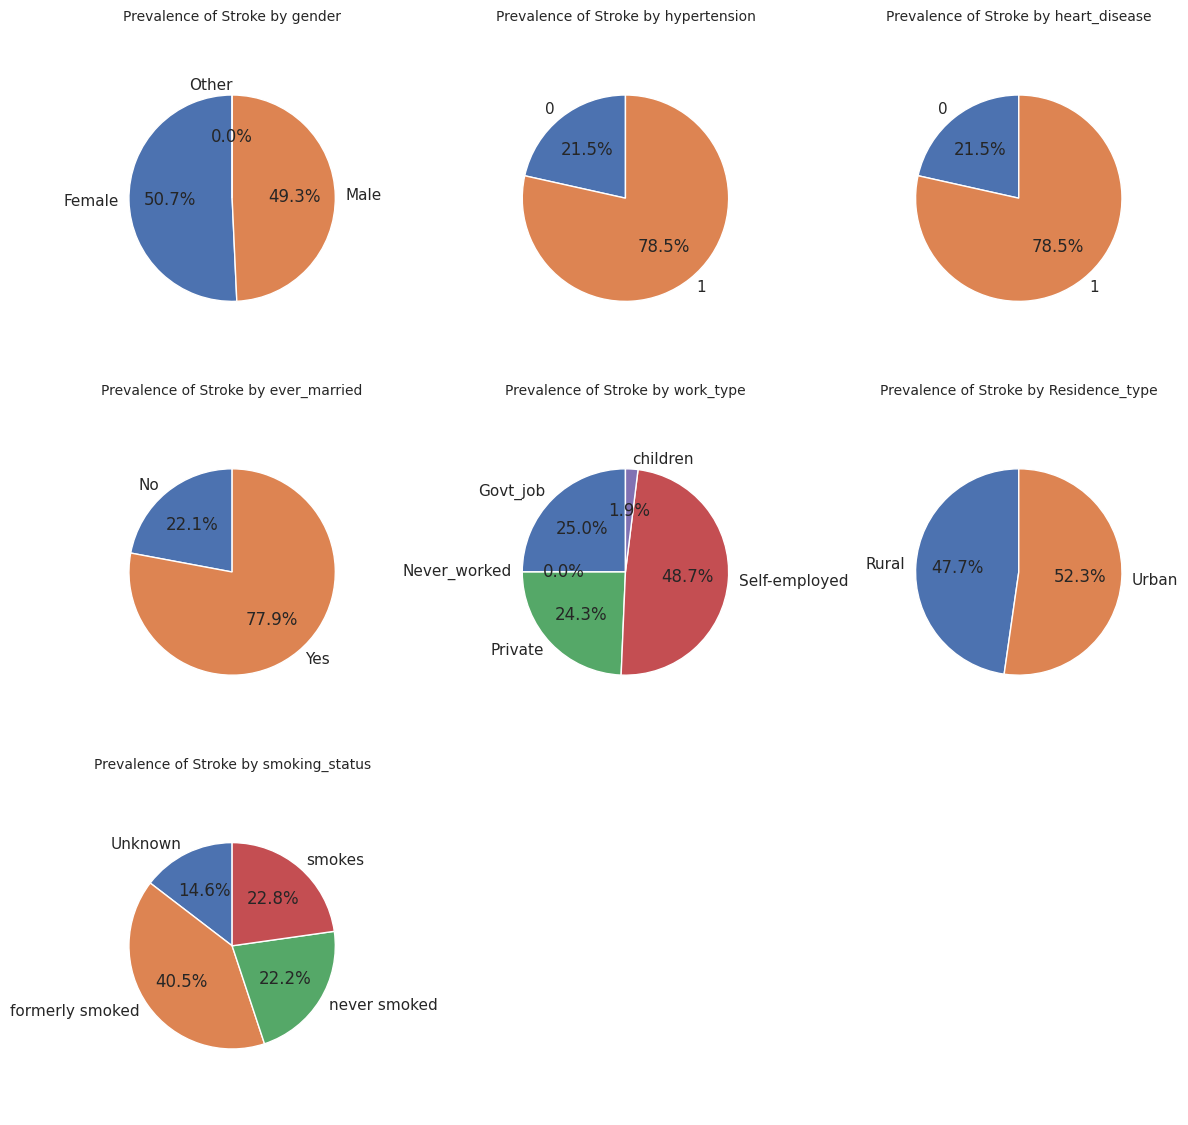

In [ ]:
import matplotlib.pyplot as plt


df_st1 = df_st.drop(['age', 'bmi', 'avg_glucose_level', 'stroke'], axis=1)

num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))

for i, col in enumerate(df_st1.columns):
    row = i // num_cols
    col_idx = i % num_cols
    grouped_data = df_st.groupby(col)['stroke'].mean()


    axes[row, col_idx].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
    axes[row, col_idx].set_title(f'Prevalence of Stroke by {col}', fontsize=10)
    axes[row, col_idx].axis('equal')

for j in range(len(df_st1.columns), num_cols * num_rows):
    row = j // num_cols
    col_idx = j % num_cols
    fig.delaxes(axes[row, col_idx])


plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

1] Stroke prevalence is slightly higher in males compared to females.


2] A significant majority of stroke cases are among those with hypertension and heart_disease.

3] Self-employed individuals have the highest prevalence of stroke.

4] The prevalence of stroke is higher in a formerly smokes people.

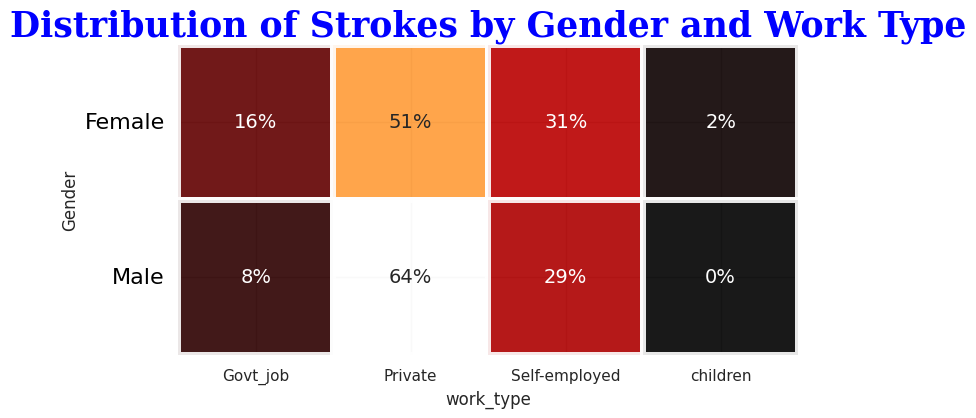

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

stroke_by_gender_wt = pd.crosstab(df_st[df_st['stroke'] == 1]['gender'], df_st[df_st['stroke'] == 1]['work_type'], normalize='index')
plt.figure(figsize=(8, 6))
sns.heatmap(data=stroke_by_gender_wt, linewidths=0, square=True, cmap="gist_heat",
            annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9, cbar=False,
linewidth = 4,linecolor = 'white')

plt.title('Distribution of Strokes by Gender and Work Type', fontdict={'font': 'Serif', 'color':'Blue','weight': 'bold', 'size': 25})
plt.ylabel('Gender')
plt.yticks(color='black', size=16,rotation = 0)
plt.show()

The distribution of stroke is more in private jobs.

In [ ]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df_st['age_bin'] = pd.cut(df_st['age'], bins=bins, labels=labels, right=False)

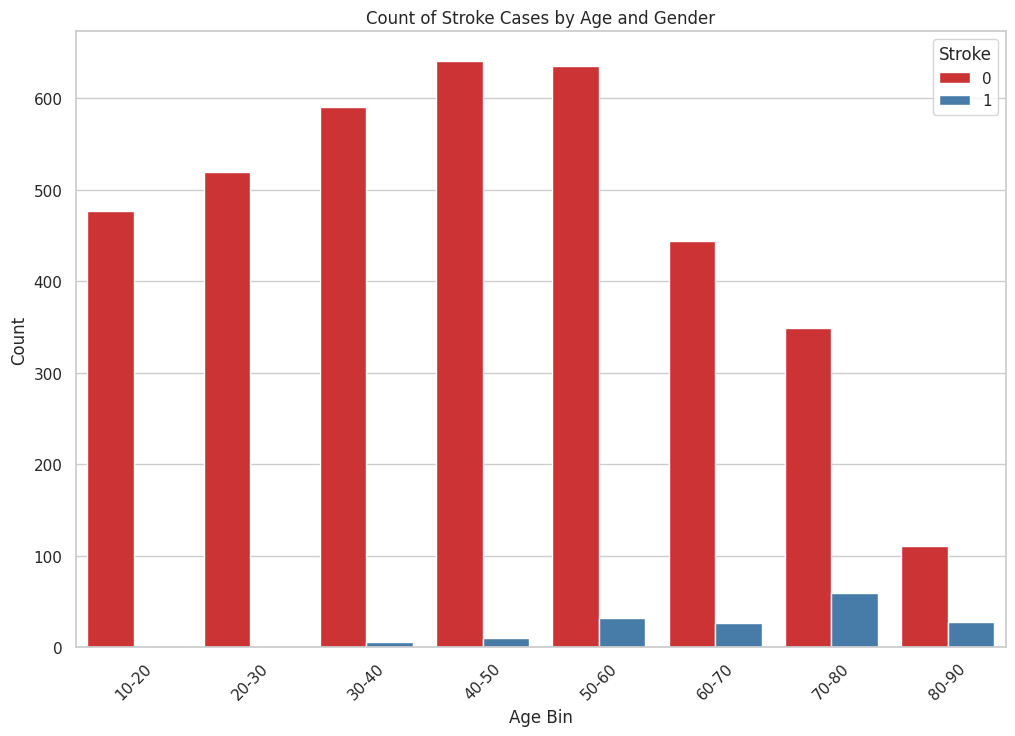

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(data=df_st, x='age_bin', hue='stroke', palette='Set1')

plt.title('Count of Stroke Cases by Age and Gender')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=45)
plt.show()

As the age increases after the 40 the probability of having stroke is also increases.

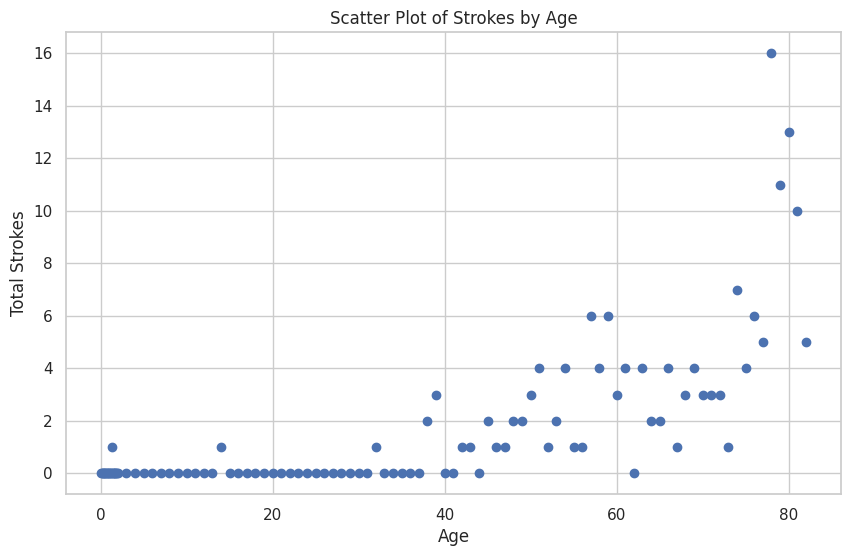

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_st' is your DataFrame with 'age' and 'stroke' columns
# Calculate the sum of strokes by age
age_stroke_sum = df_st.groupby('age')['stroke'].sum()

plt.figure(figsize=(10, 6))

plt.scatter(age_stroke_sum.index, age_stroke_sum.values)
plt.title('Scatter Plot of Strokes by Age')
plt.xlabel('Age')
plt.ylabel('Total Strokes')
plt.show()

<Axes: xlabel='age'>

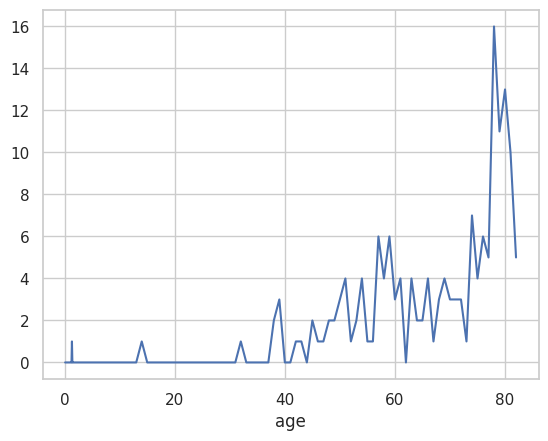

In [ ]:
df_st.groupby("age").stroke.sum().plot.line()

It is observed that after the age of 40 the chances of stroke increases.

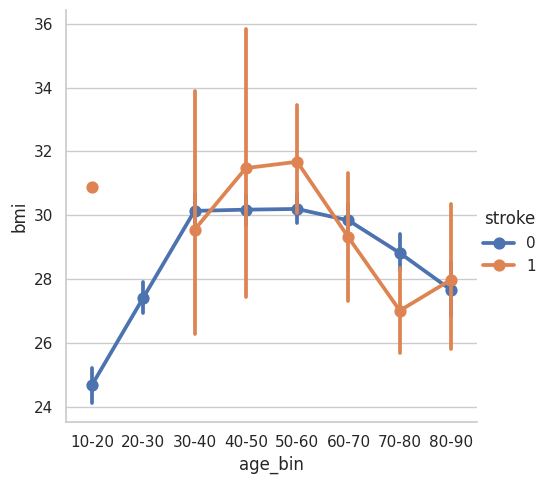

In [ ]:
sns.catplot(x='age_bin', y='bmi', data=df_st, kind='point',hue='stroke')
plt.show()

Between the age group 40-50, 50-60 bmi of people having stroke is more who have not stroke.

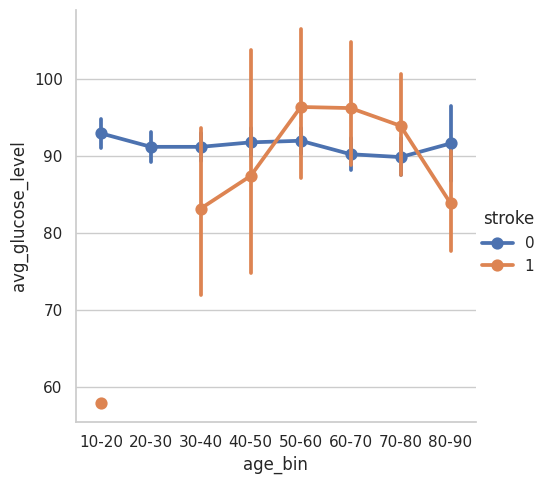

In [ ]:
sns.catplot(x='age_bin', y='avg_glucose_level', data=df_st, kind='point',hue='stroke')
plt.show()

Avg_glu_level between the age bin 50-80 is more for the peoples having stroke.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_st.select_dtypes(include=['object']):
  df_st[col] = le.fit_transform(df_st[col])

In [ ]:
df_st.drop('age_bin',axis=1,inplace=True)

In [ ]:
df_st.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df_st.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,27.0,0,0,0,2,1,126.09,25.1,0,0
1,1,8.0,0,0,0,4,0,121.99,19.6,0,0
2,1,62.0,0,0,1,3,0,136.18,32.2,0,0
3,1,32.0,0,0,1,3,1,160.64,20.4,3,0
4,1,43.0,0,0,1,2,1,92.71,30.5,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_st['bmi'] = ss.fit_transform(df_st['bmi'].values.reshape(-1,1))
df_st['age'] = ss.fit_transform(df_st['age'].values.reshape(-1,1))
df_st['avg_glucose_level'] = ss.fit_transform(df_st['avg_glucose_level'].values.reshape(-1,1))

In [ ]:
corr = df_st.corr()

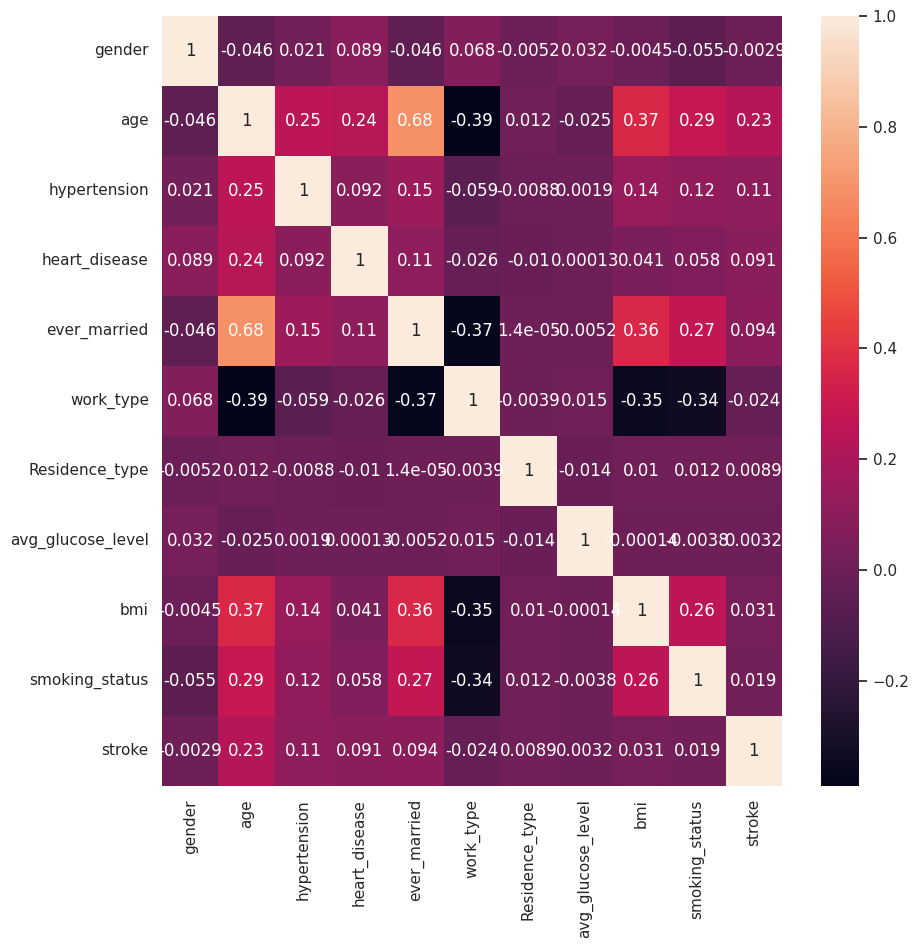

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
df_st.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 Stroke is highly correlated with age.


In [ ]:
columns = df_st[['age','hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'smoking_status']]
corr = columns.corr()

<Axes: >

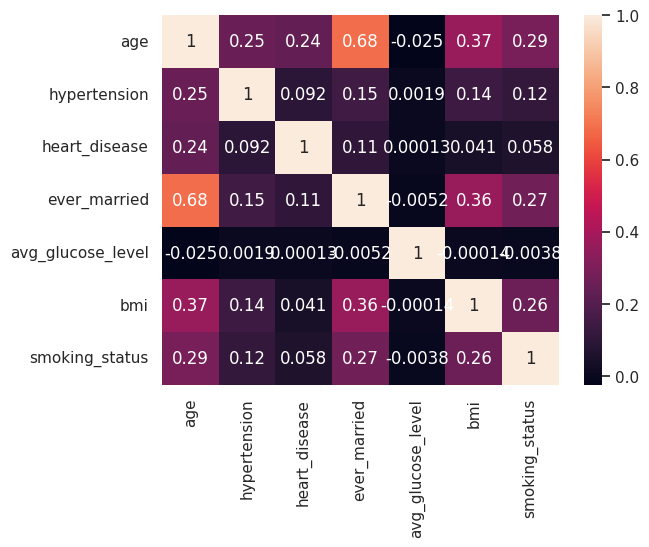

In [ ]:
sns.heatmap(corr,annot=True)

The age is highly correlated with a bmi.

In [ ]:
y = df_st['stroke']
x = df_st[['age', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]

In [ ]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2)
#kfold = KFold(n_splits=15, shuffle=True, random_state=42)
kfold = KFold(n_splits=15)

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,

)

In [ ]:
selector = SelectFromModel(rfc)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

In [ ]:
rfc.fit(x_train_selected, y_train)
y_train_pred_rfc = rfc.predict(x_train_selected)
y_test_pred_rfc = rfc.predict(x_test_selected)

In [ ]:
y_train_pred_rfc = rfc.predict(x_train_selected)
y_test_pred_rfc = rfc.predict(x_test_selected)

In [ ]:
print("Random Forest Classifier Report - Training Data")
print(classification_report(y_train, y_train_pred_rfc))
print("Random Forest Classifier Report - Testing Data")
print(classification_report(y_test, y_test_pred_rfc))

Random Forest Classifier Report - Training Data
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3387
           1       0.94      0.96      0.95      3382

    accuracy                           0.95      6769
   macro avg       0.95      0.95      0.95      6769
weighted avg       0.95      0.95      0.95      6769

Random Forest Classifier Report - Testing Data
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       844
           1       0.95      0.94      0.95       849

    accuracy                           0.95      1693
   macro avg       0.95      0.95      0.95      1693
weighted avg       0.95      0.95      0.95      1693



In [ ]:
cf = confusion_matrix(y_test,y_test_pred_rfc)

<Axes: >

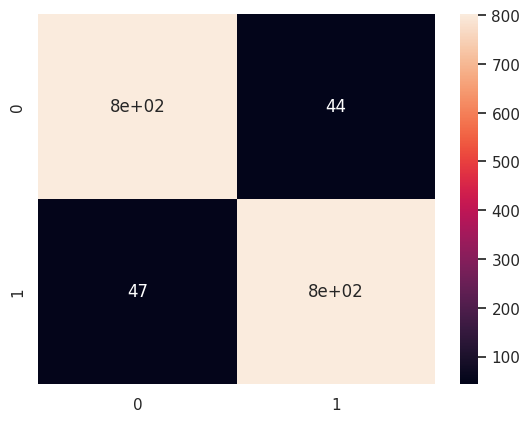

In [ ]:
sns.heatmap(cf,annot=True)

In [ ]:
print("Random Forest Classifier Accuracy - Training Data")
print(accuracy_score(y_train, y_train_pred_rfc))
print("Random Forest Classifier Accuracy - Testing Data")
print(accuracy_score(y_test, y_test_pred_rfc))

Random Forest Classifier Accuracy - Training Data
0.9482936918304034
Random Forest Classifier Accuracy - Testing Data
0.9462492616656822
